---
title: "Eurovision data for Tidy Tuesday - trying it out in Python"
format: 
  html:
    code-fold: false
jupyter: python3
---

## Tidy Tuesday - Eurovision!

Testing out a few things with Python in an attempt to branch out from R for a change. 

HTML document rendered using [quarto](https://quarto.org/docs/get-started/hello/jupyter.html) jupyter extension. 


First we will load in the libraries. Will be mostly using pandas and plot line, but will show some matplotlib and seaborn too

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *

In [2]:
# load in the data
eurovision = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-17/eurovision.csv')

eurovision.head()

,event,host_city,year,host_country,event_url,section,artist,song,artist_url,image_url,artist_country,country_emoji,running_order,total_points,rank,rank_ordinal,qualified,winner
0,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Kalush Orchestra,Stefania,https://eurovision.tv/participant/kalush-orche...,https://static.eurovision.tv/hb-cgi/images/963...,Ukraine,:flag_ua:,6.0,337.0,1.0,1st,True,False
1,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,S10,De Diepte,https://eurovision.tv/participant/s10-22,https://static.eurovision.tv/hb-cgi/images/963...,Netherlands,:flag_nl:,8.0,221.0,2.0,2nd,True,False
2,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Amanda Georgiadi Tenfjord,Die Together,https://eurovision.tv/participant/amanda-georg...,https://static.eurovision.tv/hb-cgi/images/963...,Greece,:flag_gr:,15.0,211.0,3.0,3rd,True,False
3,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,MARO,"Saudade, Saudade",https://eurovision.tv/participant/maro-22,https://static.eurovision.tv/hb-cgi/images/963...,Portugal,:flag_pt:,10.0,208.0,4.0,4th,True,False
4,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Intelligent Music Project,Intention,https://eurovision.tv/participant/intelligent-...,https://static.eurovision.tv/hb-cgi/images/963...,Bulgaria,:flag_bg:,7.0,29.0,16.0,16th,False,False


In [11]:
# quick check of how the data is organised. We only want the finals
eurovision['section'].value_counts()

final                917
grand-final          462
second-semi-final    266
first-semi-final     261
semi-final            99
Name: section, dtype: int64

### cleaning and aggregating
Now we do some cleaning and aggreating. Looking to find out some averages for points and rank, as well as total wins. Finally, we make a win ratio. 

In [72]:
# make col with winner as number
eurovision['winner_int'] = eurovision.winner.astype(int)
# aggregate points, rank, and winner by country
euro_agg = eurovision.loc[(eurovision["section"]  == 'final') | (eurovision["section"] == 'grand-final'), :].groupby('artist_country').agg(
    avg_points=pd.NamedAgg(column="total_points", aggfunc="mean"),
    avg_rank=pd.NamedAgg(column="rank", aggfunc="mean"),
    tot_wins = pd.NamedAgg(column='winner_int', aggfunc='sum'),
    tot_years = pd.NamedAgg(column='year', aggfunc='count')).sort_values('tot_wins', ascending=False).reset_index()

euro_agg['win_ratio'] = (euro_agg['tot_wins']/euro_agg['tot_years'])*100

euro_agg.head(11)

,artist_country,avg_points,avg_rank,tot_wins,tot_years,win_ratio
0,Ireland,76.177778,8.866667,7,45,15.555556
1,Sweden,99.796610,8.400000,6,60,10.000000
2,France,67.761905,9.907692,5,66,7.575758
3,Luxembourg,40.657143,8.815789,5,38,13.157895
4,Netherlands,65.080000,10.129630,5,55,9.090909
5,United Kingdom,72.174603,9.343750,5,65,7.692308
6,Israel,85.567568,10.540541,4,37,10.810811
7,Ukraine,198.823529,8.411765,3,17,17.647059
8,Denmark,64.681818,10.000000,3,44,6.818182
9,Italy,100.200000,7.166667,3,49,6.122449


This is a function I made a while back to pull extract hex codes from the [coolors](https://coolors.co/) website. 

In [66]:
# function to make hex codes from coolors url
def coolors(URL):
    # function takes coolors url, extracts hex codes and adds #
    if URL.find("palette") != -1:
    # extract just the hex
        cstr = URL.replace("coolors.co", "")
        cstr = cstr.replace("https:///", "")
        cstr = cstr.replace("palette/", "")
        cstr = cstr.replace("-", " ")

    # split into individual strings and add #
        clist = cstr.split(" ")
        cols = []

        for hex in range(len(clist)):
            cols.append((str("#" + clist[hex])))

        return cols
    else:
        # extract just the hex
        cstr = URL.replace("coolors.co", "")
        cstr = cstr.replace("https:///", "")
        cstr = cstr.replace("-", " ")
    # split into individual strings and add #
        clist = cstr.split(" ")
        cols = []

        for hex in range(len(clist)):
            cols.append((str("#" + clist[hex])))

        return cols


In [41]:
# little test to see if a yearly aggregation would be interesting
euro_years = (eurovision.loc[(eurovision["section"]  == 'final') | (eurovision["section"] == 'grand-final'), :]
).groupby(by = ['year', 'artist_country']).agg(
    tot_points=pd.NamedAgg(column="total_points", aggfunc="sum"),
    rank=pd.NamedAgg(column="rank", aggfunc="mean")
    ).sort_values('tot_points', ascending=False).reset_index()

euro_years.head()

,year,artist_country,tot_points,rank
0,2017,Portugal,758.0,1.0
1,2022,Ukraine,631.0,1.0
2,2017,Bulgaria,615.0,2.0
3,2016,Ukraine,534.0,1.0
4,2018,Israel,529.0,1.0


### plotting

First up is matplotlib, very simple test with year and total points

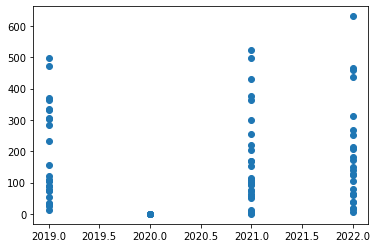

In [64]:
x, y = euro_years.loc[euro_years['year'] > 2018, 'year'], euro_years.loc[euro_years['year'] > 2018, 'tot_points']

x = np.array(x).astype(int)
y = np.array(y)

plt.scatter(x, y)
#plt.legend()
plt.show()

Now we try using seaborn with average points and rank. 

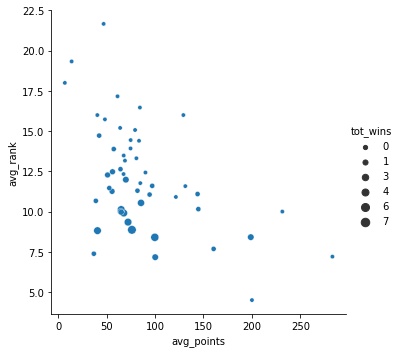

In [47]:
sns.relplot(
    data = euro_agg,
    x = 'avg_points', y = 'avg_rank',
    size = 'tot_wins'
)

Finally we move to plotnine, which is the Python version of ggplot2. It doesn't have all the amazing extensions of ggplot2, but seems to work okay. First thing is to get the palette ready. Then we construct the plot. Using xkcd for something a bit fun. 

In [75]:
# make palette
pal_url = "https://coolors.co/palette/cc4400-d66915-e08e29-f0c761-ffff99-c2fcff-7cc6de-3890bc-1c489a-000077-35e6ae"
pal = coolors(pal_url)
print(pal)

['#cc4400', '#d66915', '#e08e29', '#f0c761', '#ffff99', '#c2fcff', '#7cc6de', '#3890bc', '#1c489a', '#000077', '#35e6ae']


In [118]:
euro_agg[euro_agg['tot_wins'] >= 3]

,artist_country,avg_points,avg_rank,tot_wins,tot_years,win_ratio
0,Ireland,76.177778,8.866667,7,45,15.555556
1,Sweden,99.796610,8.400000,6,60,10.000000
2,France,67.761905,9.907692,5,66,7.575758
3,Luxembourg,40.657143,8.815789,5,38,13.157895
4,Netherlands,65.080000,10.129630,5,55,9.090909
5,United Kingdom,72.174603,9.343750,5,65,7.692308
6,Israel,85.567568,10.540541,4,37,10.810811
7,Ukraine,198.823529,8.411765,3,17,17.647059
8,Denmark,64.681818,10.000000,3,44,6.818182
9,Italy,100.200000,7.166667,3,49,6.122449


/Users/MOLES/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 8 x 6 in image.
/Users/MOLES/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: eurovision.png


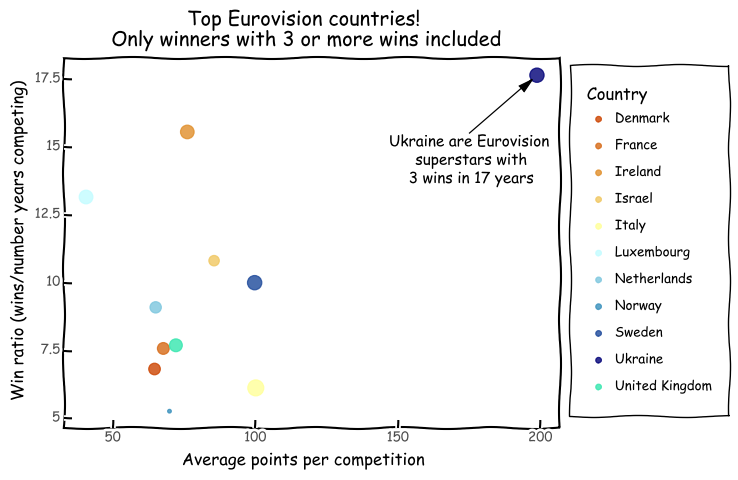

<ggplot: (8787416446163)>

In [125]:
euro_plot = ggplot(euro_agg[euro_agg['tot_wins'] >= 3], aes(x = 'avg_points', y = 'win_ratio', color = 'artist_country', size = "avg_rank")) +\
    geom_point(alpha = 0.8) +\
    scale_color_manual(values = pal) +\
    scale_size(trans = 'reverse', guide = False) +\
    labs(title = "Top Eurovision countries!\n Only winners with 3 or more wins included",
         x = "Average points per competition",
         y = "Win ratio (wins/number years competing)",
         color = "Country") +\
     annotate("text", x = 175, y = 14.5, label = "Ukraine are Eurovision\n superstars with\n 3 wins in 17 years") +\
     annotate('segment', x = 175, y = 15.5, xend = 197, yend = 17.5, arrow = arrow(angle=15, length=0.15, type='closed')) +\
    theme_xkcd()

euro_plot.save("eurovision.png", width=8, height=6, dpi=320)

euro_plot

In [126]:
# quick look at the best win ratios
euro_agg.sort_values('win_ratio', ascending=False).head(10)

,artist_country,avg_points,avg_rank,tot_wins,tot_years,win_ratio
7,Ukraine,198.823529,8.411765,3,17,17.647059
0,Ireland,76.177778,8.866667,7,45,15.555556
3,Luxembourg,40.657143,8.815789,5,38,13.157895
6,Israel,85.567568,10.540541,4,37,10.810811
19,Latvia,97.100000,11.600000,1,10,10.000000
1,Sweden,99.796610,8.400000,6,60,10.000000
4,Netherlands,65.080000,10.129630,5,55,9.090909
18,Serbia,143.909091,11.090909,1,11,9.090909
5,United Kingdom,72.174603,9.343750,5,65,7.692308
26,Azerbaijan,144.692308,10.153846,1,13,7.692308
